# Algorithms Exercise 2

## Imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Peak finding

Write a function `find_peaks` that finds and returns the indices of the local maxima in a sequence. Your function should:

* Properly handle local maxima at the endpoints of the input array.
* Return a Numpy array of integer indices.
* Handle any Python iterable as input.

In [15]:
def find_peaks(a):
    """Find the indices of the local maxima in a sequence."""
    peaks = []
    data = np.array(a)
    deriv = np.diff(data)
    if deriv[0] < 0:
        peaks.append(0)
    for i in range(1,len(deriv)):
        if deriv[i]<0 and deriv[i-1]>0:
            peaks.append(i)
    if deriv[-1] >0:
        peaks.append(len(data)-1)
    return np.array(peaks)

In [16]:
p1 = find_peaks([2,0,1,0,2,0,1])
assert np.allclose(p1, np.array([0,2,4,6]))
p2 = find_peaks(np.array([0,1,2,3]))
assert np.allclose(p2, np.array([3]))
p3 = find_peaks([3,2,1,0])
assert np.allclose(p3, np.array([0]))

Here is a string with the first 10000 digits of $\pi$ (after the decimal). Write code to perform the following:

* Convert that string to a Numpy array of integers.
* Find the indices of the local maxima in the digits of $\pi$.
* Use `np.diff` to find the distances between consequtive local maxima.
* Visualize that distribution using an appropriately customized histogram.

In [24]:
from sympy import pi, N
pi_digits_str = str(N(pi, 10001))[2:]
pi_dig_num=np.array(list(pi_digits_str))
pi_dig_num=pi_dig_num.astype(int)
peak=find_peaks(pi_dig_num)
peakdiff=np.diff(peak)

[1 4 1 ..., 6 7 8]


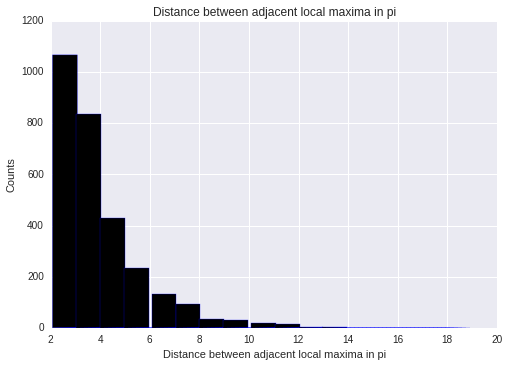

In [59]:
plt.hist(peakdiff, bins=100, width=1, color='k',edgecolor='b', align='right');
plt.xlabel("Distance between adjacent local maxima in pi")
plt.ylabel("Counts")
plt.title("Distance between adjacent local maxima in pi");

In [60]:
assert True # use this for grading the pi digits histogram